In [1]:
%matplotlib inline

In [2]:
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

sns.set(style="whitegrid")

# You may load the dataset from URL (instead of the local file) if you wish
auto_mpg_data = "https://raw.githubusercontent.com/fundamentals-of-data-science/datasets/master/auto-mpg.data.txt"
auto_mpg_names = "https://raw.githubusercontent.com/fundamentals-of-data-science/datasets/master/auto-mpg.names.txt"

D:\Users\CHRIS\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Building a predictive model for mpg from vehicle data


# Table of Contents:

   ### 1.1 [ETL](#etl)
   
   ### 1.2 [EDA](#eda)
   
   ### 1.3 [Build the model](#build)
   
   ### 1.4 [Describe the model](#describe)
   
   ### 1.5 [Use the model](#use)

<a id="etl"></a> 
## 1.1 - ETL


The dataframe contains data about city-cycle fuel consumption in miles per gallon (mpg) as well as some vehicle info.

The variables are:

* [mpg](#mpg)
* [cylinders](#cylinders)
* [displacement](#displacement)
* [horsepower](#horsepower)
* [weight](#weight)
* [acceleration](#acceleration)
* [model_year](#model_year)
* [origin](#origin)
* [car_name](#car_name)


We'll start by loading the data:

In [3]:
import pandas as pd

In [4]:
df = pd.read_fwf(auto_mpg_data,header=None)

In [5]:
df.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name']


<a id="eda"></a> 
## 1.2 - EDA


The question or problem is to build a predictive model for mpg. This exploratory data analysis is just the first step. We will first look at the patterns in each individual variable and then look to see if there are any patterns between mpg and any of the other variables.

We'll look at the overall characteristics of the data to make sure it loaded correctly. First, let's get the basic data frame info:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


There are 398 records (or observations) for each variable. horsepower is supposed to be a float64 variable type, however our info fucntion returned a datatype of object, indicating possible missing values.  

Removing the rows with missing values:

In [7]:
df_1=df[df['horsepower']!='?'].reset_index(drop=True)

In [8]:
df_1['horsepower']=df_1['horsepower'].astype(float)

Let's look at the first few rows:

In [9]:
df_1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


<a id="mpg"></a> 

## MPG

mpg is the main variable of interest and represents the city-cycle fuel consumption in miles per gallon (mpg) by the cars in the database. 

We would expect the distribution to be right-skewed as car manufacturers would tend to manufacture cars to have as low of an mpg in order for it to be feasibile to the consumer.


We'll start by looking at the summary statistics:

In [10]:
df_1.mpg.describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

The variable is right skewed. The mean is 23.44 and the median is 22.75. The minimum value is 9 , and the first quartile is at 17 wich is not that much of a difference as compared to the difference between the 3rd quartile of 29 and the maximum value of 46.6. 

Let's plot a histogram of the data: 


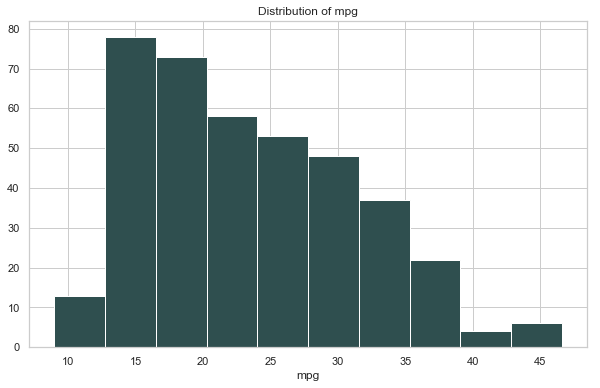

In [11]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df_1.mpg, color="darkslategray")
axes.set_title("Distribution of mpg")
axes.set_xlabel("mpg")

plt.show()
plt.close()

The data looks skewed to the right which makes sense. 

The mpg cannot be too low and car manufacturers aim to keep it as low as they can.

Looking at the rawest resolution of the data with a bin size of 1:

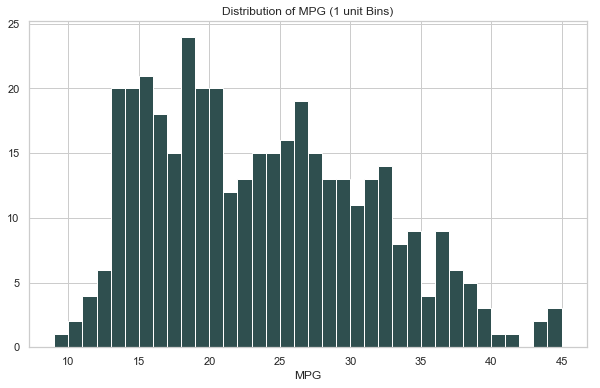

In [12]:
mn = int(df_1.mpg.min())
mx = int(df_1.mpg.max())
bins = [i for i in range(mn, mx, 1)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df_1.mpg,bins=bins, color="darkslategray")
axes.set_title("Distribution of MPG (1 unit Bins)")
axes.set_xlabel("MPG")

plt.show()
plt.close()

The distribution doesn't look very regular. There may be a number of factors influencing subgroups of mpg that is creating a mixture of distributions. 

<a id="cylinders"></a>
## Cylinders

Cylinders is the number of cylinders the car's engine has. 

Let's first see the summary statistics:


In [13]:
df_1.cylinders.describe()

count    392.000000
mean       5.471939
std        1.705783
min        3.000000
25%        4.000000
50%        4.000000
75%        8.000000
max        8.000000
Name: cylinders, dtype: float64

Although we can't see the distribution here, the first two quartiles includes 4 cylinders so at least 50% of the cars in the data have 4 cylinders.

The statistics would seem to suggest that the number of cylinders is right-skewed because the mean is greater than the median. 

Because the number of children is so small, we can treat the data like a discrete, categorical variable:

In [14]:
df_1.cylinders.value_counts(normalize=True).sort_index()

3    0.010204
4    0.507653
5    0.007653
6    0.211735
8    0.262755
Name: cylinders, dtype: float64

Graphically:

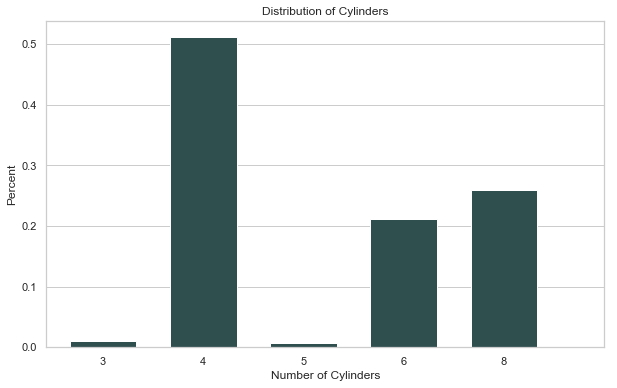

In [15]:
data = df.cylinders.value_counts(normalize=True).sort_index()
x = range( len( data))
width = 1/1.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, data, width, align="center", color="darkslategray")
axes.set_xticks([0, 1, 2, 3, 4, 5])
axes.set_xticklabels(data.axes[0])
axes.set_title( "Distribution of Cylinders")
axes.set_xlabel("Number of Cylinders")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)

plt.show()
plt.close()

As expected the data is right skewed with 50%< of the data on 4 cylinders, 2% of the total data on 3 and 5 cylinders, and the remaining distributed between 6 and 8 cylinders.

<a id="displacement"></a>

## Displacement

Engine displacement is the combined swept volume of the pistons inside the cylinders of an engine. It is calculated from the bore (diameter of the cylinders), stroke (distance the piston travels), and number of cylinders.

It is a numeric variable. We expect that the data will be distributed about the same as the number of cylinders, so to the right.

Let's first look at the summary statistics for Displacement to get a sense for the range actually covered.

In [16]:
df_1.displacement.describe()

count    392.000000
mean     194.411990
std      104.644004
min       68.000000
25%      105.000000
50%      151.000000
75%      275.750000
max      455.000000
Name: displacement, dtype: float64

As expected, the mean is significantly greater than the median, and the difference between the third quartile and the max value is significant.

The data will definitely be right-skewed.

Showing this graphically:

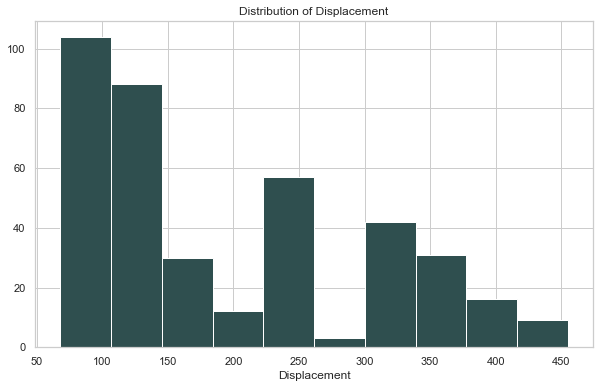

In [17]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df_1.displacement, color="darkslategray")
axes.set_title("Distribution of Displacement")
axes.set_xlabel("Displacement")

plt.show()
plt.close()

<a id="horsepower"></a>

## Horsepower

Horsepower is a measurement of the power of the engine.

Engine displacement is a determining factor in the horsepower and torque that an engine produces, as well as how much fuel that engine consumes.

Horsepower is a numeric variable. We expect that the data will be distributed about the same as the displacement and mpg, so to the right.

Let's first look at the summary statistics to get a sense for the range actually covered.

In [18]:
df_1.horsepower.describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

The mean is greater than the median.

The min value is much less than the first quartile and the max value is double the third quartile.

Therefore, we would expect the the distribution is definitely right skewed, with a quantity of extreme variables showing before the peak.

Plotting the distribution:

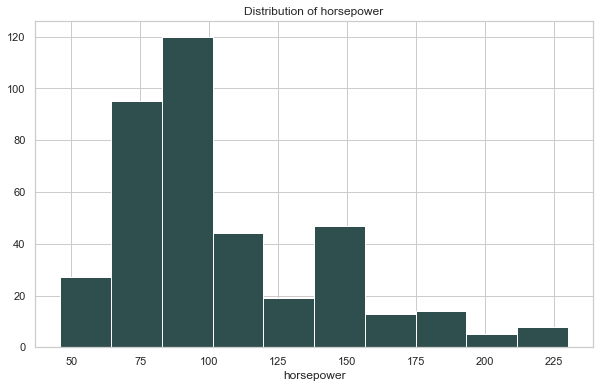

In [19]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df_1.horsepower, color="darkslategray")
axes.set_title("Distribution of horsepower")
axes.set_xlabel("horsepower")

plt.show()
plt.close()

As expected, we have a quantity of values in the first bin that are less than 62.5, with most of the values lying between 75-126.

<a id="weight"></a>

## Weight

Weight is a measurement of the weight of the car in lbs.

Weight is a numeric variable.

Let's first look at the summary statistics:

In [20]:
df_1.weight.describe()

count     392.000000
mean     2977.584184
std       849.402560
min      1613.000000
25%      2225.250000
50%      2803.500000
75%      3614.750000
max      5140.000000
Name: weight, dtype: float64

Although the mean and median are very close, taking a look at the quartiles, there is a small difference between the first and second quartile as compared to the third.

This suggests a right skewed distribution.

Showing this graphically:

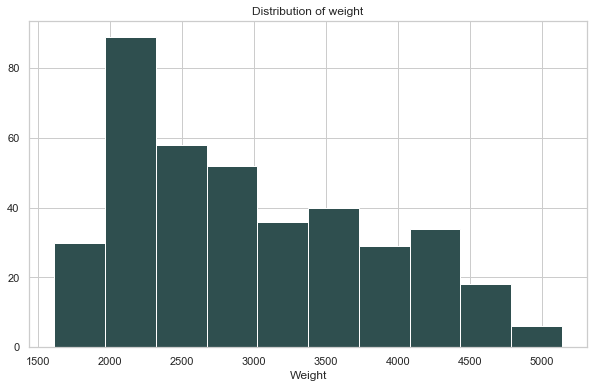

In [21]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df_1.weight, color="darkslategray")
axes.set_title("Distribution of weight")
axes.set_xlabel("Weight")

plt.show()
plt.close()

<a id="acceleration"></a>

## Acceleration

Acceleration is a measurement of the cars acceleration, 

The data does not provide how exactly the acceleration is measured whether it is 0-60 mph 0-100 kmh.

Let's first look at the summary statistics:

In [22]:
df_1.acceleration.describe()

count    392.000000
mean      15.541327
std        2.758864
min        8.000000
25%       13.775000
50%       15.500000
75%       17.025000
max       24.800000
Name: acceleration, dtype: float64

The mean and median are almost equal with the first and third quartile almost equidistant from the mean/median.

Therefore suggesting that the data is normally distributed.

Plotting the distribution:

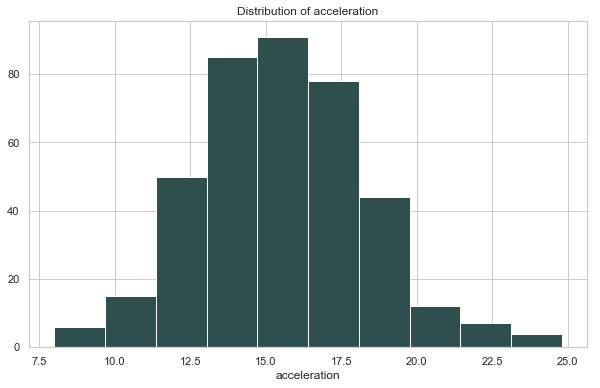

In [23]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df_1.acceleration, color="darkslategray")
axes.set_title("Distribution of acceleration")
axes.set_xlabel("acceleration")

plt.show()
plt.close()

The data is indeed normal.

<a id="model_year"></a>
## Model Year

Model Year is the year that the car was manfactured. 

Let's first see the summary statistics:


In [24]:
df_1.model_year.describe()

count    392.000000
mean      75.979592
std        3.683737
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: model_year, dtype: float64

Vieweing the normalized value counts of model_year:

In [25]:
df_1.model_year.value_counts(normalize=True,sort=True)

73    0.102041
78    0.091837
76    0.086735
82    0.076531
75    0.076531
79    0.073980
70    0.073980
81    0.071429
77    0.071429
72    0.071429
80    0.068878
71    0.068878
74    0.066327
Name: model_year, dtype: float64

Most of the years have an equal number of cars more or less with the exception of the years of 73,76,and 78 which have slightly more.

<a id="origin"></a>
## Origin

Origin is the region where the car was manfactured.

This is a categorical variable.

Let's first see the summary statistics:


In [26]:
df_1.origin.describe()

count    392.000000
mean       1.576531
std        0.805518
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: origin, dtype: float64

In [27]:
df_1.origin.value_counts(normalize=True).sort_index()

1    0.625000
2    0.173469
3    0.201531
Name: origin, dtype: float64

origin can take a value of 1,2 and 3.

Lets get determine what they stand for:

In [28]:
df_1[df_1['origin']==1].head(15)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,"""ford galaxie 500"""
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,"""chevrolet impala"""
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,"""plymouth fury iii"""
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,"""pontiac catalina"""
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,"""amc ambassador dpl"""


In [29]:
df_1[df_1['origin']==2].head(15)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
19,26.0,4,97.0,46.0,1835.0,20.5,70,2,"""volkswagen 1131 deluxe sedan"""
20,25.0,4,110.0,87.0,2672.0,17.5,70,2,"""peugeot 504"""
21,24.0,4,107.0,90.0,2430.0,14.5,70,2,"""audi 100 ls"""
22,25.0,4,104.0,95.0,2375.0,17.5,70,2,"""saab 99e"""
23,26.0,4,121.0,113.0,2234.0,12.5,70,2,"""bmw 2002"""
49,28.0,4,116.0,90.0,2123.0,14.0,71,2,"""opel 1900"""
50,30.0,4,79.0,70.0,2074.0,19.5,71,2,"""peugeot 304"""
51,30.0,4,88.0,76.0,2065.0,14.5,71,2,"""fiat 124b"""
54,27.0,4,97.0,60.0,1834.0,19.0,71,2,"""volkswagen model 111"""
58,23.0,4,97.0,54.0,2254.0,23.5,72,2,"""volkswagen type 3"""


In [30]:
df_1[df_1['origin']==3].head(15)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
14,24.0,4,113.0,95.0,2372.0,15.0,70,3,"""toyota corona mark ii"""
18,27.0,4,97.0,88.0,2130.0,14.5,70,3,"""datsun pl510"""
29,27.0,4,97.0,88.0,2130.0,14.5,71,3,"""datsun pl510"""
31,25.0,4,113.0,95.0,2228.0,14.0,71,3,"""toyota corona"""
52,31.0,4,71.0,65.0,1773.0,19.0,71,3,"""toyota corolla 1200"""
53,35.0,4,72.0,69.0,1613.0,18.0,71,3,"""datsun 1200"""
56,24.0,4,113.0,95.0,2278.0,15.5,72,3,"""toyota corona hardtop"""
70,19.0,3,70.0,97.0,2330.0,13.5,72,3,"""mazda rx2 coupe"""
80,28.0,4,97.0,92.0,2288.0,17.0,72,3,"""datsun 510 (sw)"""
81,23.0,4,120.0,97.0,2506.0,14.5,72,3,"""toyouta corona mark ii (sw)"""


Based on the data above:

Region 1 is USA

Region 2 is Europe

Region 3 is Japan

62.5 % of the data is from region 1 whereas the rest is distributed between regions 2 and 3.

<a id="car_name"></a>
## Car Name

Car Name is the name of the car. 

This is a categorical variable.

Although performing an EDA on this variable as is may be fruitless, we can extract the manufacturers from the name and perform an EDA on the amnufacturers.


In [31]:
df_1['manufacturer']=df_1['car_name'].apply(lambda x: x.split(' ')[0])
df_1['manufacturer']=df_1['manufacturer'].apply(lambda x: x.replace('"',''))
df_1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,manufacturer
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu""",chevrolet
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320""",buick
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite""",plymouth
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst""",amc
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino""",ford


In [32]:
df_1.manufacturer.value_counts(normalize=True,sort=True)

ford             0.122449
chevrolet        0.109694
plymouth         0.079082
dodge            0.071429
amc              0.068878
toyota           0.063776
datsun           0.058673
buick            0.043367
pontiac          0.040816
volkswagen       0.038265
honda            0.033163
mercury          0.028061
mazda            0.025510
oldsmobile       0.025510
peugeot          0.020408
fiat             0.020408
audi             0.017857
vw               0.015306
chrysler         0.015306
volvo            0.015306
opel             0.010204
subaru           0.010204
saab             0.010204
chevy            0.007653
renault          0.007653
maxda            0.005102
cadillac         0.005102
mercedes-benz    0.005102
bmw              0.005102
triumph          0.002551
capri            0.002551
nissan           0.002551
mercedes         0.002551
chevroelt        0.002551
vokswagen        0.002551
hi               0.002551
toyouta          0.002551
Name: manufacturer, dtype: float64

Splitting the data by region:

In [33]:
df_reg1=df_1[df_1['origin']==1].reset_index(drop=True)
df_reg1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,manufacturer
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu""",chevrolet
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320""",buick
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite""",plymouth
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst""",amc
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino""",ford


In [34]:
df_reg1.manufacturer.value_counts(normalize=True,sort=True)

ford          0.195918
chevrolet     0.175510
plymouth      0.126531
dodge         0.114286
amc           0.110204
buick         0.069388
pontiac       0.065306
mercury       0.044898
oldsmobile    0.040816
chrysler      0.024490
chevy         0.012245
cadillac      0.008163
chevroelt     0.004082
capri         0.004082
hi            0.004082
Name: manufacturer, dtype: float64

Ford and Capri are the same manufacturer.

Chevrolet, Chevy, and Chevroelt are the same.

In [35]:
for index,row in df_1.iterrows():
    if (df_1.iloc[index,9]=='capri'):
        df_1.iloc[index,9]='ford'
    elif(df_1.iloc[index,9]=='chevy'):
        df_1.iloc[index,9]='chevrolet'
    elif(df_1.iloc[index,9]=='chevroelt'):
        df_1.iloc[index,9]='chevrolet'

In [36]:
df_reg1=df_1[df_1['origin']==1].reset_index(drop=True)
df_reg1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,manufacturer
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu""",chevrolet
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320""",buick
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite""",plymouth
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst""",amc
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino""",ford


In [37]:
df_reg1.manufacturer.value_counts(normalize=True,sort=True)

ford          0.200000
chevrolet     0.191837
plymouth      0.126531
dodge         0.114286
amc           0.110204
buick         0.069388
pontiac       0.065306
mercury       0.044898
oldsmobile    0.040816
chrysler      0.024490
cadillac      0.008163
hi            0.004082
Name: manufacturer, dtype: float64

Ford and Chevrolet are the leading manufacturers in region 1, whereas Cadillac and HI (International Harvesters) as per the dataset are the lowest producing manufactuers as per the dataset.

Moving on to region 2 (Europe):

In [38]:
df_reg2=df_1[df_1['origin']==2].reset_index(drop=True)
df_reg2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,manufacturer
0,26.0,4,97.0,46.0,1835.0,20.5,70,2,"""volkswagen 1131 deluxe sedan""",volkswagen
1,25.0,4,110.0,87.0,2672.0,17.5,70,2,"""peugeot 504""",peugeot
2,24.0,4,107.0,90.0,2430.0,14.5,70,2,"""audi 100 ls""",audi
3,25.0,4,104.0,95.0,2375.0,17.5,70,2,"""saab 99e""",saab
4,26.0,4,121.0,113.0,2234.0,12.5,70,2,"""bmw 2002""",bmw


In [39]:
df_reg2.manufacturer.value_counts(normalize=True,sort=True)

volkswagen       0.220588
peugeot          0.117647
fiat             0.117647
audi             0.102941
vw               0.088235
volvo            0.088235
opel             0.058824
saab             0.058824
renault          0.044118
bmw              0.029412
mercedes-benz    0.029412
vokswagen        0.014706
triumph          0.014706
mercedes         0.014706
Name: manufacturer, dtype: float64

volkswagen, vw, and vokswagen are the same manufacturer.

mercedes-benz and mercedes are the same manufacturer.


In [40]:
for index,row in df_1.iterrows():
    if (df_1.iloc[index,9]=='vw'):
        df_1.iloc[index,9]='volkswagen'
    elif(df_1.iloc[index,9]=='vokswagen'):
        df_1.iloc[index,9]='volkswagen'
    elif(df_1.iloc[index,9]=='mercedes'):
        df_1.iloc[index,9]='mercedes-benz'

In [41]:
df_reg2=df_1[df_1['origin']==2].reset_index(drop=True)

In [42]:
df_reg2.manufacturer.value_counts(normalize=True,sort=True)

volkswagen       0.323529
peugeot          0.117647
fiat             0.117647
audi             0.102941
volvo            0.088235
opel             0.058824
saab             0.058824
renault          0.044118
mercedes-benz    0.044118
bmw              0.029412
triumph          0.014706
Name: manufacturer, dtype: float64

Volkswagen is the leading manufacturer in region 2 (Europe) with 32% .

Triumph manufactured the least cars as per the dataset with 1.5%.

Moving on to region 3 (Japan):

In [43]:
df_reg3=df_1[df_1['origin']==3].reset_index(drop=True)

In [44]:
df_reg3.manufacturer.value_counts(normalize=True,sort=True)

toyota     0.316456
datsun     0.291139
honda      0.164557
mazda      0.126582
subaru     0.050633
maxda      0.025316
toyouta    0.012658
nissan     0.012658
Name: manufacturer, dtype: float64

toyota and toyouta are the same.

mazda and maxda are the same.

In [45]:
for index,row in df_1.iterrows():
    if (df_1.iloc[index,9]=='toyouta'):
        df_1.iloc[index,9]='toyota'
    elif(df_1.iloc[index,9]=='maxda'):
        df_1.iloc[index,9]='mazda'

In [46]:
df_reg3=df_1[df_1['origin']==3].reset_index(drop=True)

In [47]:
df_reg3.manufacturer.value_counts(normalize=True,sort=True)

toyota    0.329114
datsun    0.291139
honda     0.164557
mazda     0.151899
subaru    0.050633
nissan    0.012658
Name: manufacturer, dtype: float64

Toyota was the leading manufacturer in region 3 (Japan) with around 33% of cars manufactured as per this dataset.

## MPG v. ?

As we have  seen, the mpg data has an irregular distribution. Generally, such distributions result from a mixture of processes that are creating distinct subgroups or populations in the data. The question is whether we can identify those subgroups using the data we have:

* [cylinders](#v_cylinders)
* [displacement](#v_displacement)
* [horsepower](#v_horsepower)
* [weight](#v_weight)
* [acceleration](#v_acceleration)
* [model_year](#v_model_year)
* [origin](#v_origin)




<a id="v_cylinders"></a>

## MPG v. Cylinders

Cylinders seems like it could be at least one explanatory variable for the different levels of mpg. Engines with more cylinders would tend to require more energy.Let's look first at correlation coefficients even though the relationship may not be linear or monotonic.

In [48]:
print("r   = ", stats.pearsonr( df_1.mpg, df_1.cylinders)[0])
print("rho = ", stats.spearmanr( df_1.mpg, df_1.cylinders)[0])

r   =  -0.7776175081260226
rho =  -0.8231746391245732


Pearson's correlation coefficient, $r$, is -0.77 which indicates a fairly strong negative relationship. Spearman's is at -0.82 which indicates a strong monotonic relationship. 

Let's take a look at the descriptive statistics:

In [49]:
def describe_by_category(data, numeric, categorical):
    grouped = data.groupby(categorical)
    grouped_y = grouped[numeric].describe()
    print(grouped_y)

In [50]:
describe_by_category(df_1, "mpg", "cylinders")

           count       mean       std   min    25%    50%    75%   max
cylinders                                                             
3            4.0  20.550000  2.564501  18.0  18.75  20.25  22.05  23.7
4          199.0  29.283920  5.670546  18.0  25.00  28.40  32.95  46.6
5            3.0  27.366667  8.228204  20.3  22.85  25.40  30.90  36.4
6           83.0  19.973494  3.828809  15.0  18.00  19.00  21.00  38.0
8          103.0  14.963107  2.836284   9.0  13.00  14.00  16.00  26.6


As per the descriptive statistics, the higher the cylinders, the lower the mpg which is explained by the negative correlative coefficients previously generated.

It is important to note that cylinders 3 and 5 consist of a very small quantity of the data, this may slightly temper with our correlative analysis.

We will omit these data points before we proceed:

In [51]:
df_2=df_1[(df_1['cylinders']!=3)&(df_1['cylinders']!=5)].reset_index(drop=True)

Regenerating the descriptive statistics:

In [52]:
describe_by_category(df_2, "mpg", "cylinders")

           count       mean       std   min   25%   50%    75%   max
cylinders                                                           
4          199.0  29.283920  5.670546  18.0  25.0  28.4  32.95  46.6
6           83.0  19.973494  3.828809  15.0  18.0  19.0  21.00  38.0
8          103.0  14.963107  2.836284   9.0  13.0  14.0  16.00  26.6


Plotting the relationship on a multibox plot:

In [53]:
def restyle_boxplot(patch):
    # change color and linewidth of the whiskers
    for whisker in patch['whiskers']:
        whisker.set(color='#000000', linewidth=1)

    # change color and linewidth of the caps
    for cap in patch['caps']:
        cap.set(color='#000000', linewidth=1)

    # change color and linewidth of the medians
    for median in patch['medians']:
        median.set(color='#000000', linewidth=2)

    # change the style of fliers and their fill
    for flier in patch['fliers']:
        flier.set(marker='o', color='#000000', alpha=0.2)

    for box in patch["boxes"]:
        box.set(facecolor='#FFFFFF', alpha=0.5)


In [54]:
def multiboxplot(data, numeric, categorical, skip_data_points=True):
    figure = plt.figure(figsize=(10, 6))

    axes = figure.add_subplot(1, 1, 1)

    grouped = data.groupby(categorical)
    labels = pd.unique(data[categorical].values)
    labels.sort()
    grouped_data = [grouped[numeric].get_group( k) for k in labels]
    patch = axes.boxplot( grouped_data, labels=labels, patch_artist=True, zorder=1)
    restyle_boxplot( patch)

    if not skip_data_points:
        for i, k in enumerate(labels):
            subdata = grouped[numeric].get_group( k)
            x = np.random.normal(i + 1, 0.01, size=len(subdata))
            axes.plot(x, subdata, 'o', alpha=0.4, color="DimGray", zorder=2)

    axes.set_xlabel(categorical)
    axes.set_ylabel(numeric)
    axes.set_title("Distribution of {0} by {1}".format(numeric, categorical))

    plt.show()
    plt.close()

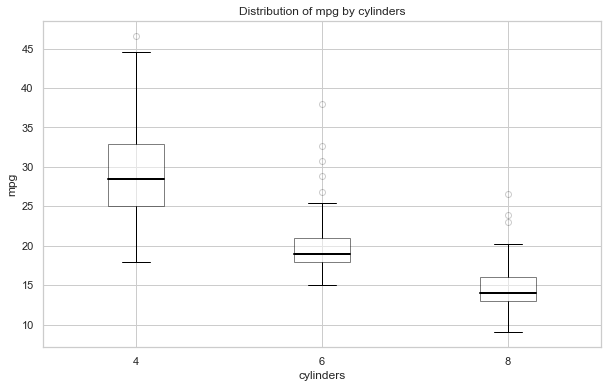

In [55]:
multiboxplot(df_2, "mpg", "cylinders")

There is a clear strong negative relationship between the number of cylinders and the mpg. 

<a id="v_displacement"></a>

## MPG v. Displacement

Displacement seems like it could be another explanatory variable for the different levels of mpg. Engines with higher displacement would tend to require more energy.

Let's look first at correlation coefficients even though the relationship may not be linear or monotonic.

In [56]:
print("r   = ", stats.pearsonr( df_2.mpg, df_2.displacement)[0])
print("rho = ", stats.spearmanr( df_2.mpg, df_2.displacement)[0])

r   =  -0.8178873629400591
rho =  -0.8760305109608002


Pearson's correlation coefficient, $r$, is -0.82 which indicates a strong negative relationship. Spearman's is at -0.88 which indicates a strong monotonic relationship. 

Plotting the data on a scatter plot:

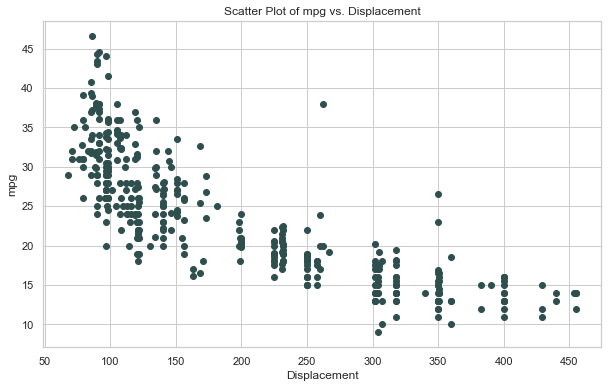

In [57]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( df_2.displacement, df_2.mpg, marker="o", color="darkslategray")

axes.set_ylabel("mpg")
axes.set_xlabel("Displacement")
axes.set_title("Scatter Plot of mpg vs. Displacement")

plt.show()
plt.close()

There definietely is a strong negative relationship between displacement and mpg, the higher the displacement the lower the mpg tends to be.

<a id="v_horsepower"></a>

## MPG v. Horsepower

Horsepower seems like it could be another explanatory variable for the different levels of mpg. Engines with higher horsepower would tend to require more energy.

Let's look first at correlation coefficients even though the relationship may not be linear or monotonic.

In [58]:
print("r   = ", stats.pearsonr( df_2.mpg, df_2.horsepower)[0])
print("rho = ", stats.spearmanr( df_2.mpg, df_2.horsepower)[0])

r   =  -0.7802588157322385
rho =  -0.8544627209004385


Pearson's correlation coefficient, $r$, is -0.78 which indicates a fairly strong negative relationship. Spearman's is at -0.85 which indicates a strong monotonic relationship. 

Plotting the data on a scatter plot:

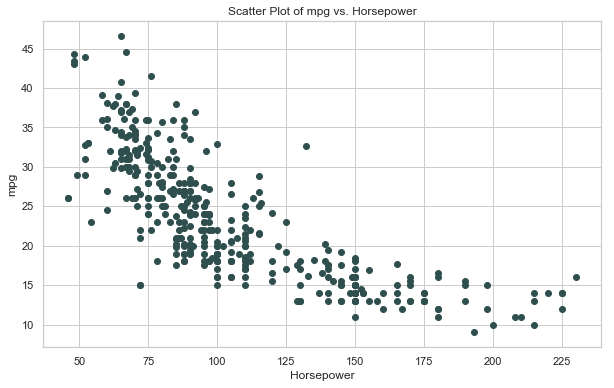

In [59]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( df_2.horsepower, df_2.mpg, marker="o", color="darkslategray")

axes.set_ylabel("mpg")
axes.set_xlabel("Horsepower")
axes.set_title("Scatter Plot of mpg vs. Horsepower")

plt.show()
plt.close()

A clear negative relationship indeed exists between mpg and horsepower as we expected.

<a id="v_weight"></a>

## MPG v. Weight

Weight seems like it could be another explanatory variable for the different levels of mpg. 

Lighter cars would tend to require less energy.

Let's look first at correlation coefficients:

In [60]:
print("r   = ", stats.pearsonr( df_2.mpg, df_2.weight)[0])
print("rho = ", stats.spearmanr( df_2.mpg, df_2.weight)[0])

r   =  -0.8426809031318667
rho =  -0.8864761282924433


Pearson's correlation coefficient, $r$, is -0.84 which indicates a fairly strong negative relationship. Spearman's is at -0.88 which indicates a strong monotonic relationship. 

Plotting the data on a scatter plot:

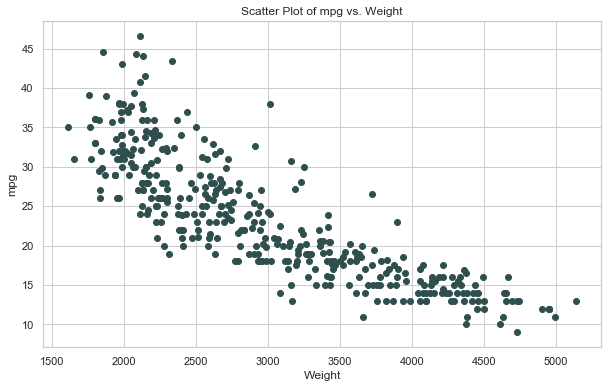

In [61]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( df_2.weight, df_2.mpg, marker="o", color="darkslategray")

axes.set_ylabel("mpg")
axes.set_xlabel("Weight")
axes.set_title("Scatter Plot of mpg vs. Weight")

plt.show()
plt.close()

A clear negative relationship indeed exists between mpg and weight as we expected.

<a id="v_acceleration"></a>

## MPG v. Acceleration

Given our individual EDA performed on Acceleration yielded a very normal distribution. We would not expect to see a strong correlation between Acceleration and MPG.

Taking a look at the correlation coefficients:

In [62]:
print("r   = ", stats.pearsonr( df_2.mpg, df_2.acceleration)[0])
print("rho = ", stats.spearmanr( df_2.mpg, df_2.acceleration)[0])

r   =  0.4193370370930719
rho =  0.4366036400155893


Pearson's correlation coefficient, $r$, is only 0.42 which indicates a fairly weak positive relationship. Spearman's resulted in 0.44 which also indicates a fairly weak monotonic relationship.

Let's plot the data:

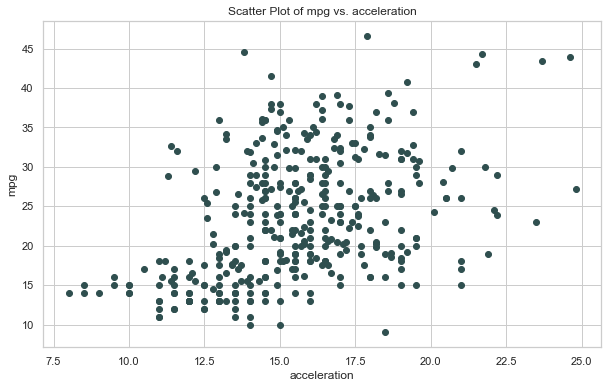

In [63]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( df_2.acceleration, df_2.mpg, marker="o", color="darkslategray")

axes.set_ylabel("mpg")
axes.set_xlabel("acceleration")
axes.set_title("Scatter Plot of mpg vs. acceleration")

plt.show()
plt.close()

Based on the plot, no strong relationship seems to exist as expected

<a id="v_model_year"></a>

## MPG v. Model Year

We do not expect to see a strong correlation between model year and mpg.

Taking a look at the correlation coefficients:

In [64]:
print("r   = ", stats.pearsonr( df_2.mpg, df_2.model_year)[0])
print("rho = ", stats.spearmanr( df_2.mpg, df_2.model_year)[0])

r   =  0.5797775394106586
rho =  0.573841745142274


Pearson's correlation coefficient, $r$, is only 0.58 which indicates a fairly weak positive relationship. Spearman's resulted in 0.57 which might indicate a medium monotonic relationship.

Let's plot the data:

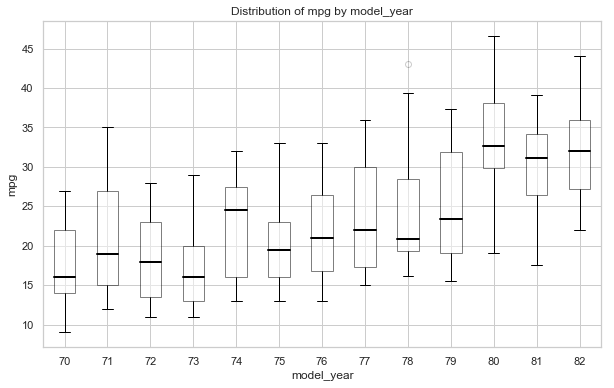

In [65]:
multiboxplot(df_2, "mpg", "model_year")

Years 70-73 stayed along the same range, 74 saw a spike with a sharp decrease in 75.

There was a gradual increase from 75-77 with a more or less maintained mpg in 78 and 79.

80 saw a spike up with a continuation of increased values between 80-82.

Taking a look at the descriptive statistics:

In [66]:
describe_by_category(df_2, "mpg", "model_year")

            count       mean       std   min     25%    50%     75%   max
model_year                                                               
70           29.0  17.689655  5.339231   9.0  14.000  16.00  22.000  27.0
71           27.0  21.111111  6.675635  12.0  15.000  19.00  27.000  35.0
72           27.0  18.703704  5.538778  11.0  13.500  18.00  23.000  28.0
73           39.0  17.076923  4.759393  11.0  13.000  16.00  20.000  29.0
74           26.0  22.769231  6.537937  13.0  16.000  24.50  27.500  32.0
75           30.0  20.266667  4.940566  13.0  16.000  19.50  23.000  33.0
76           34.0  21.573529  5.889297  13.0  16.750  21.00  26.375  33.0
77           27.0  23.444444  6.792719  15.0  17.250  22.00  30.000  36.0
78           35.0  24.168571  6.968111  16.2  19.300  20.80  28.500  43.1
79           28.0  25.082143  6.918630  15.5  19.025  23.45  31.825  37.3
80           25.0  34.104000  6.836512  19.1  29.800  32.70  38.100  46.6
81           28.0  30.185714  5.635319

It appears that each of the years had a similar amount of data, allowing the results to be conclusive, that there is a medium relationship between model_year and mpg.

I would expect that another variable interacting with model_year may be influencing this correlation with mpg.

Possibly, the technology of manufacturing engines with more or less cylinders changed over the years.

Generating the descriptive statistics of model_year with cylinders:

In [67]:
describe_by_category(df_2, "cylinders", "model_year")

            count      mean       std  min  25%  50%  75%  max
model_year                                                    
70           29.0  6.758621  1.724926  4.0  6.0  8.0  8.0  8.0
71           27.0  5.629630  1.667521  4.0  4.0  6.0  7.0  8.0
72           27.0  5.925926  2.036700  4.0  4.0  4.0  8.0  8.0
73           39.0  6.461538  1.744859  4.0  4.0  8.0  8.0  8.0
74           26.0  5.230769  1.607674  4.0  4.0  4.0  6.0  8.0
75           30.0  5.600000  1.522249  4.0  4.0  6.0  6.0  8.0
76           34.0  5.647059  1.667558  4.0  4.0  6.0  7.5  8.0
77           27.0  5.555556  1.783112  4.0  4.0  4.0  8.0  8.0
78           35.0  5.371429  1.516298  4.0  4.0  6.0  6.0  8.0
79           28.0  5.857143  1.799471  4.0  4.0  6.0  8.0  8.0
80           25.0  4.160000  0.553775  4.0  4.0  4.0  4.0  6.0
81           28.0  4.642857  1.095928  4.0  4.0  4.0  6.0  8.0
82           30.0  4.200000  0.610257  4.0  4.0  4.0  4.0  6.0


It seems that with time, manufacturers tended to produce cars with less cylinders explaining the rise in mpg with time.

<a id="v_origin"></a>

## MPG v. Origin

We do not expect to see a strong correlation between origin and mpg.

Taking a look at the correlation coefficients:

In [68]:
print("r   = ", stats.pearsonr( df_2.mpg, df_2.origin)[0])
print("rho = ", stats.spearmanr( df_2.mpg, df_2.origin)[0])

r   =  0.5828805773851071
rho =  0.5940637541731193


Pearson's correlation coefficient, $r$, is only 0.58 which indicates a fairly weak positive relationship. Spearman's resulted in 0.59 which might indicate a medium monotonic relationship.

Let's plot the data:

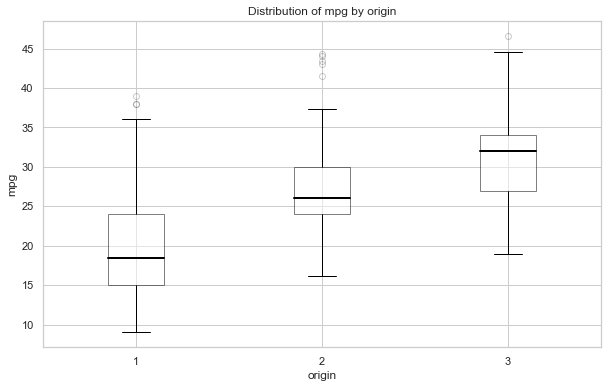

In [69]:
multiboxplot(df_2, "mpg", "origin")

A clear relationship is shown between origin and mpg.

Taking a look at the descriptive statistics:

In [70]:
describe_by_category(df_2, "mpg", "origin")

        count       mean       std   min   25%   50%   75%   max
origin                                                          
1       245.0  20.033469  6.440384   9.0  15.0  18.5  24.0  39.0
2        65.0  27.613846  6.573428  16.2  24.0  26.0  30.0  44.3
3        75.0  30.978667  5.765913  19.0  27.0  32.0  34.1  46.6


It is important to note that origin 1 (USA) has more than 3 times the data as regions 2 and 3 have. 

This could have an effect in the results.

Furthermore, the region could have a correlation with the number of cylinders possibly due to regional manufacturing standards which may be effecting the mpg.

Performing a correlative analysis on region and cylinders:

In [71]:
print("r   = ", stats.pearsonr( df_2.cylinders, df_2.origin)[0])
print("rho = ", stats.spearmanr( df_2.cylinders, df_2.origin)[0])

r   =  -0.5571046794330228
rho =  -0.6010130033306899


There is a negative medium monotonic relationship with a Spearman coefficient of -0.60

Taking a look at the descriptive statistics:

In [72]:
describe_by_category(df_2, "cylinders", "origin")

        count      mean       std  min  25%  50%  75%  max
origin                                                    
1       245.0  6.277551  1.655996  4.0  4.0  6.0  8.0  8.0
2        65.0  4.123077  0.484371  4.0  4.0  4.0  4.0  6.0
3        75.0  4.160000  0.546240  4.0  4.0  4.0  4.0  6.0


As expected, 50% of region 1's values are 6 cylinders and below, with a max value of 8 cylinders.

75% of regions 2 and 3's cylinders are 4 cylinders with a max value of 6 cylinders.

Regions 2 and 3 tend to produce engines with less cylinders and therefore a higher mpg.

<a id="build"></a> 
## 1.3 - Build the model

Reviewing the EDA done in the previous section:

The data contains a number of variables. We have cylinders, displacement, horsepower, weight, acceleration, model_year, manufacturer, and the target variable mpg. 

* MPG - Exponential distribution-ish.
* Cylinders - Multinomial distribution.
* Displacement - Exponential distribution-ish.
* Horsepower - Exponential distribution-ish.
* Weight - Exponential distribution-ish.
* Acceleration - Normal distribution
* Model Year - Multinomial distribution.
* Origin - Multinomial distribution.
* Manufacturer - Multinomial distribution.


Let's review our pairwise EDA with the target variable, mpg:

* cylinders - definite negative relationship. 
* displacement - definite negative relationship. 
* horsepower - definite negative relationship. 
* weight - definite negative relationship.
* acceleration - no strong apparent relationship.
* model year - a relationship exists, but this may be due to a correlation between model_year and cylinders
* origin - a relationship exists, but this may be due to a correlation between origin and cylinders

We didn't look at manufacturer but there would be a correlation between manufacturer and cylinders due to the manfacturers clear correlation with origin.

Since we've decided to use a linear model, it is much more important to look at the correlation coefficients between each variable and the target, and each other but first we need those dummy variables:

In [73]:
df_2 = pd.concat([df_2, pd.get_dummies(df_2["origin"], prefix="origin")], axis=1)
df_2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,manufacturer,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu""",chevrolet,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320""",buick,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite""",plymouth,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst""",amc,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino""",ford,1,0,0


And now we can generate a summary of our correlation coefficients:

In [74]:
def correlations(data, y, xs):
    rs = []
    rhos = []
    for x in xs:
        r = stats.pearsonr(data[y], data[x])[0]
        rs.append(r)
        rho = stats.spearmanr(data[y], data[x])[0]
        rhos.append(rho)
    return pd.DataFrame({"feature": xs, "r": rs, "rho": rhos})

In [75]:
correlations(df_2, "mpg", ["cylinders", "displacement", "horsepower", 
                                    "weight", "acceleration", "model_year", 
                                    "origin_1", "origin_2"])

,feature,r,rho
0,cylinders,-0.794872,-0.847094
1,displacement,-0.817887,-0.876031
2,horsepower,-0.780259,-0.854463
3,weight,-0.842681,-0.886476
4,acceleration,0.419337,0.436604
5,model_year,0.579778,0.573842
6,origin_1,-0.576695,-0.581226
7,origin_2,0.240032,0.247670


There are some interesting results here:

1. **cylinders** - negative relationship
2. **displacement** - negative relationship
3. **horsepower** - negative relationship
4. **weight** - negative relationship, the strongest one.
5. **acceleration** - There is a relationship, but may not be linear
6. **model_year** - There is a relationship, but may not be linear
7. **origin_1** - There is a relaitonship, but may not be linear
8. **origin_2** - There is a relatively small relationship, may not be linear.

Before estimating any linear models, let's look at the Null model (the mean):


In [76]:
df_2.mpg.describe()

count    385.000000
mean      23.445455
std        7.836911
min        9.000000
25%       17.000000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

The lowest mpg is 9 and the highest is 46.6. The mean is 23.44 with a standard deviation of 7.83. 

7.83 is the $\sigma$ of the Null model.

Let's fit a "all variables in" model:

In [77]:
import models

In [78]:
model = "mpg ~ cylinders+ displacement+ horsepower+ weight + acceleration + model_year + origin_1 + origin_2"
result1 = models.bootstrap_linear_regression(model, data=df_2)
print(models.describe_bootstrap_lr(result1))

Model: mpg ~ cylinders+ displacement+ horsepower+ weight + acceleration + model_year + origin_1 + origin_2
------------  ---------  ------  -------  -----
                                 95% BCI
Coefficients             Mean    Lo       Hi
              $\beta_0$  -12.08  -20.19   -3.56
cylinders     $\beta_1$  -0.67   -1.22    0.01
displacement  $\beta_2$  0.02    0.01     0.04
horsepower    $\beta_3$  -0.01   -0.04    0.01
weight        $\beta_4$  -0.01   -0.01    -0.01
acceleration  $\beta_5$  0.01    -0.20    0.26
model_year    $\beta_6$  0.76    0.66     0.83
origin_1      $\beta_7$  -3.05   -4.10    -2.08
origin_2      $\beta_8$  -0.71   -1.97    0.61

Metrics       Mean       Lo      Hi
$\sigma$      3.21       2.87    3.47
$R^2$         0.84       0.81    0.86
------------  ---------  ------  -------  -----


The correlation coefficient is 84% which is pretty good. The error has been cut by about 60% compared to the Null model. 

Taking a look at the coefficients as per our statistical expectations:

In [79]:
predictions = {"cylinders":"-","displacement":"-","horsepower":"-","weight": "-","acceleration": "-","model_year": "+","origin_1": "-", "origin_2": "+"}
models.evaluate_coefficient_predictions(predictions, result1)

cylinders P(<0)=0.960 (strong)
displacement P(<0)=0.000 (weak)
horsepower P(<0)=0.800 (strong)
weight P(<0)=1.000 (strong)
acceleration P(<0)=0.450 (mixed)
model_year P(>0)=1.000 (strong)
origin_1 P(<0)=1.000 (strong)
origin_2 P(>0)=0.180 (weak)


Cylinders, Horsepower, Weight, Model Year and Origin_1 have the expected signs.

Acceleration is giving us a mixed result.

Displacement and Origin_2 are giving us weak results.

It seems that we mat be having multicollinearity issues.

Testing for the multicollinearity of weight vs the rest of the variables, as weight had the highest correlation to mpg as per our previous summary of correlation coefficients:

In [80]:
correlations(df_2, "weight", ["cylinders", "horsepower", 
                                    "displacement", "acceleration", "model_year", 
                                    "origin_1", "origin_2"])

,feature,r,rho
0,cylinders,0.900707,0.882803
1,horsepower,0.868906,0.888882
2,displacement,0.935296,0.952115
3,acceleration,-0.431067,-0.421683
4,model_year,-0.315424,-0.289386
5,origin_1,0.604512,0.633913
6,origin_2,-0.306427,-0.314061


High correlations between weight and displacement.

This will definitely tamper with our Beta estimates.

Thereofore, displacement will be removed.

What about the residuals:

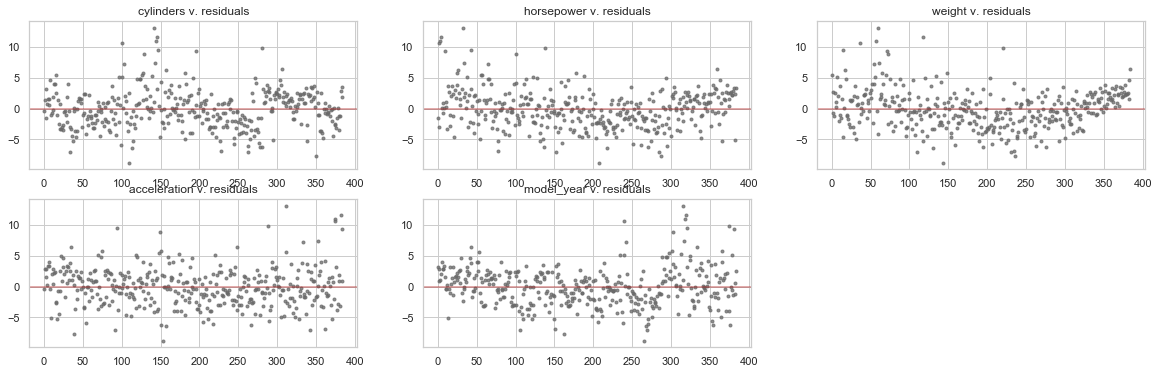

In [81]:
figure = plt.figure(figsize=(20,6))

variables = ["cylinders","horsepower","weight", "acceleration", "model_year"]

plots = len( variables)
rows = (plots // 3) + 1

for i, variable in enumerate( variables):
    axes = figure.add_subplot(rows, 3, i + 1)

    keyed_values = sorted( zip( df_2[ variable].values, result1[ "residuals"]), key=lambda x: x[ 0])
    residuals = [x[ 1][ 0] for x in keyed_values]
    
    axes.plot(list(range(0, result1[ "n"])), residuals, '.', color="dimgray", alpha=0.75)
    axes.axhline(y=0.0, xmin=0, xmax=result1[ "n"], c="firebrick", alpha=0.5)
    axes.set_title( variable + " v. residuals")

plt.show()
plt.close()

horsepower and weight show signs of higher errors on the lower values.

cylinders plot is relatively uniform with a few extreme spikes in the 150 region.

acceleration is relatively uniform.

model_year relatively uniform with more extreme spikes in the higher values.

Applying a logarithmic transformation to mpg, cylinders, horsepower, weight and acceleration may significantly improve our model.

But first lets calculate the *adjusted* $R^2$ of our current model:

In [82]:
models.adjusted_r_squared(result1)

0.8315309516110867

In [83]:
def log( x):
    return np.log(float( x))

for column in ["mpg","cylinders","horsepower","weight", "acceleration"]:
    df_2[ "log_" + column] = df_2[ column].apply( log)

In [84]:
df_2['log_mpg'].describe()

count    385.000000
mean       3.097741
std        0.341812
min        2.197225
25%        2.833213
50%        3.135494
75%        3.367296
max        3.841601
Name: log_mpg, dtype: float64

Estimating our model with the new log() values:

In [85]:
model =  "log_mpg ~ log_cylinders+log_horsepower+log_weight +log_acceleration+ model_year + origin_1+origin_2"
result2 = models.bootstrap_linear_regression(model, data=df_2)
print(models.describe_bootstrap_lr(result2))


Model: log_mpg ~ log_cylinders+log_horsepower+log_weight +log_acceleration+ model_year + origin_1+origin_2
----------------  ---------  -----  -------  -----
                                    95% BCI
Coefficients                 Mean   Lo       Hi
                  $\beta_0$  7.25   6.60     7.83
log_cylinders     $\beta_1$  -0.15  -0.25    -0.06
log_horsepower    $\beta_2$  -0.26  -0.37    -0.15
log_weight        $\beta_3$  -0.54  -0.68    -0.41
log_acceleration  $\beta_4$  -0.20  -0.31    -0.10
model_year        $\beta_5$  0.03   0.03     0.03
origin_1          $\beta_6$  -0.05  -0.08    -0.02
origin_2          $\beta_7$  -0.02  -0.06    0.02

Metrics           Mean       Lo     Hi
$\sigma$          0.11       0.10   0.11
$R^2$             0.90       0.89   0.92
----------------  ---------  -----  -------  -----


The $R^2$ value has significantly increased to 0.90, with a $\sigma$ of 0.11. The $\sigma$ is a 67% decrease from the null mode;, a definite improvement over our first model.

What about the *adjusted* $R^2$:

In [86]:
models.adjusted_r_squared(result2)

0.8996573109504675

The *adjusted* $R^2$ shows a whopping value of ~ 0.90, reconfirming the clear improvement.

Performing a coefficient analysis:

In [87]:
predictions = {"log_cylinders":"-","log_horsepower":"-","log_weight": "-","log_acceleration": "-","model_year": "+","origin_1": "-", "origin_2": "+"}
models.evaluate_coefficient_predictions(predictions, result2)

log_cylinders P(<0)=1.000 (strong)
log_horsepower P(<0)=1.000 (strong)
log_weight P(<0)=1.000 (strong)
log_acceleration P(<0)=1.000 (strong)
model_year P(>0)=1.000 (strong)
origin_1 P(<0)=1.000 (strong)
origin_2 P(>0)=0.170 (weak)


All return strong results except for origin_2.

Rerunning the model without origin_2:

In [88]:
model =  "log_mpg ~ log_cylinders+log_horsepower+log_weight +log_acceleration+ model_year + origin_1"
result3 = models.bootstrap_linear_regression(model, data=df_2)
print(models.describe_bootstrap_lr(result3))


Model: log_mpg ~ log_cylinders+log_horsepower+log_weight +log_acceleration+ model_year + origin_1
----------------  ---------  -----  -------  -----
                                    95% BCI
Coefficients                 Mean   Lo       Hi
                  $\beta_0$  7.27   6.60     7.93
log_cylinders     $\beta_1$  -0.14  -0.20    -0.05
log_horsepower    $\beta_2$  -0.25  -0.35    -0.14
log_weight        $\beta_3$  -0.56  -0.69    -0.46
log_acceleration  $\beta_4$  -0.20  -0.31    -0.10
model_year        $\beta_5$  0.03   0.03     0.03
origin_1          $\beta_6$  -0.04  -0.08    -0.02

Metrics           Mean       Lo     Hi
$\sigma$          0.11       0.10   0.11
$R^2$             0.90       0.89   0.92
----------------  ---------  -----  -------  -----


The $R^2$ and $\sigma$ have remained the same, how about the *adjusted* $R^2$:

In [89]:
models.adjusted_r_squared(result3)

0.8996713204545834

The *adjusted*  $R^2$ showed a slight improvement.

We can conclude that this is our final model.

<a id="describe"></a> 
## 1.4 - Describe the model

Our final model therefore consists of the following features:

- **log_cylinders**: The logarithmic value of the number of cylinders that the engine has
- **log_horsepower**: The logarithmic value of the horsepower of the car
- **log_weight**: The logarithmic value of the weight
- **log_acceleration**: The logarithmic value of the acceleration of the car
- **model_year**: The year that the car was manfactured 
- **origin_1**: a boolean binary feature indicating a value of 1 is if the car originated from the USA.

The final coefficients are as follows:
- **$\beta_0$**:  7.27   
- **$\beta_1$**: -0.14 
- **$\beta_2$**: -0.25
- **$\beta_3$**: -0.56  
- **$\beta_4$**: -0.20  
- **$\beta_5$**:  0.03   
- **$\beta_6$**: -0.04  

Overall, all the coefficients are credible, zeros are not included with their intervals and the ranges are relatively narrow.

All the signs are negative except for model_year which is supported by our EDA. The higher the cylinders, horsepower, weight, and acceleration the higher the energy required for the car to move. Therefore requiring a larger mpg. 

model_year is positive, as shown in our EDA, manufacturers tended to produce cars with less cylinders with time, therefore resulting in a lower mpg.

origin_1 is negative as American cars tended to have more cylinders.

Our final model is therefore:

**log_mpg = 7.27 - 0.14 $\times$ log_cylinders - 0.25 $\times$ log_horsepower - 0.56 $\times$ log_weight -0.20 $\times$ log_acceleration + 0.03 $\times$ model_year - 0.04 $\times$ origin_1**


In order to calclate the generalization error, first we're going define some functions: 



Instead of MSE, I'm using standard error (the square root) :

In [90]:
def sse(results):
    errors = results['residuals']
    n = len( errors)
    squared_error = np.sum( [e**2 for e in errors])
    return np.sqrt((1.0/n) * squared_error)

The function "chunks" `xs` into `n` chunks.

In [91]:
def chunk(xs, n):
    k, m = divmod(len(xs), n)
    return [xs[i * k + min(i, m):(i + 1) * k + min(i + 1, m)] for i in range(n)]

This next function does the actual cross validation:

In [92]:
def cross_validation(algorithm, formula, data, evaluate, fold_count=10, repetitions=3):
    indices = list(range(len( data)))
    metrics = []
    for _ in range(repetitions):
        random.shuffle(indices)
        folds = chunk(indices, fold_count)
        for fold in folds:
            test_data = data.iloc[fold]
            train_indices = [idx not in fold for idx in indices]
            train_data = data.iloc[train_indices]
            result = algorithm(formula, data=train_data)
            model = result["model"]
            y, X = patsy.dmatrices(formula, test_data, return_type="matrix")
            # y = np.ravel( y) # might need for logistic regression
            results = models.summarize(formula, X, y, model)
            metric = evaluate(results)
            metrics.append(metric)
    return metrics

Let's run `cross_validation` on our model and data:

In [93]:
import random
import patsy

In [94]:
formula = "log_mpg ~ log_cylinders+log_horsepower+log_weight +log_acceleration+ model_year + origin_1"
result = cross_validation(models.linear_regression, formula, df_2, lambda r: (r["sigma"], r["r_squared"]))

In [95]:
result_e = cross_validation(models.linear_regression, formula, df_2, sse)

In [96]:
print(r"95% CI for sigma:", stats.mstats.mquantiles([r[0] for r in result], [0.025, 0.975]))

95% CI for sigma: [0.08249075 0.14909007]


In [97]:
print(r"95% CI for R^2:", stats.mstats.mquantiles([r[1] for r in result], [0.025, 0.975]))

95% CI for R^2: [0.84618273 0.95770876]


In [98]:
print(r"95% CI for SSE:", stats.mstats.mquantiles([result_e], [0.025, 0.975]))

95% CI for SSE: [0.07692761 0.13317283]


The *difference* between the two intervals is that the first Bootstrap results are based on a model evaluated against the data it was tested with whereas the 10 fold cross validation simulates the application of the model against data that was not used to train it.

Thus, when we field this model into "production" (use it on new data), the 10 fold cross validation results simulate the range of results we should expect to see.

Another possible interpretation of the question is that we can calculate the *mean* $\sigma$ ,$R^2$ and SSE and calculate the 95% credible intervals for the *mean* values. This also makes sense. If we want to predict the average performance, we might want to see the credible intervals for that *average* performance (yes, we are estimating the average performance of a model that estimates mpg).

Let's start by seeing what the mean values are:

In [99]:
sigmas = [r[0] for r in result]
r_squareds = [r[1] for r in result]

In [100]:
print("mean sigma: ", np.mean(sigmas))
print("mean R^2: ", np.mean(r_squareds))

mean sigma:  0.11749073381874722
mean R^2:  0.8967364726985199


In [101]:
print("mean SSE: ", np.mean(result_e))

mean SSE:  0.10621201836284956


In [102]:
def resample(data):
    n = len(data)
    return [data[ i] for i in [stats.randint.rvs(0, n - 1) for _ in range( 0, n)]]

In [103]:
bootstrap = {}
bootstrap["sigma"] = np.array([np.mean(s) for s in [resample(sigmas) for i in range( 0, 1000)]])
bootstrap["r_squared"] = np.array([np.mean(r) for r in [resample(r_squareds) for i in range( 0, 1000)]])

In [104]:
posterior_sse = np.array([np.mean(s) for s in [resample(result_e) for i in range( 0, 1000)]])

In [105]:
print(r"95% CI for *mean* sigma:", stats.mstats.mquantiles(bootstrap["sigma"], [0.025, 0.975]))

95% CI for *mean* sigma: [0.11171418 0.1240771 ]


In [106]:
print(r"95% CI for *mean* R^2:", stats.mstats.mquantiles(bootstrap["r_squared"], [0.025, 0.975]))

95% CI for *mean* R^2: [0.88732115 0.90771034]


In [107]:
print(r"95% CI for *mean* SSE:", stats.mstats.mquantiles(posterior_sse, [0.025, 0.975]))

95% CI for *mean* SSE: [0.10208148 0.11138895]


We have fairly tight bounds.

Taking $R^2$ as our metric, our generalization error is:

In [108]:
np.abs((np.mean(r_squareds)-result3['r_squared']))*100/result3['r_squared']

0.5572458541202173

< 1%

<a id="use"></a> 
## 1.5 - Use the model

The mean value of log_cylinders,log_horsepower,log_weight,log_acceleration and model_year are, respectively:

In [109]:
df_2.log_cylinders.mean()

1.659145695069636

In [110]:
df_2.log_horsepower.mean()

4.589365464103951

In [111]:
df_2.log_weight.mean()

7.960460522813039

In [112]:
df_2.log_acceleration.mean()

2.727491439382793

In [113]:
df_2.model_year.mean()

75.96103896103897

Lets take the number of cylinders as 4 whcih equals to a log value of 1.38

Horsepower as 98 which equals to a log value of 4.59

Weight as 2860 which equals to a log value of 7.96

Acceleration as 15.2 which equals to a log value of 2.72

model_year as 76 

origin_1 as 1

Using that feature vector in the `predict` function of the `LinearRegression` model, we have the following $\hat{log mpg}$:

In [114]:
predicted = result3["model"].predict(np.array([[1, 1.38, 4.59, 7.96, 2.72, 76, 1]]))[0][0]
predicted

3.1228903621176087

A log_mpg value of 3.122 was predicated. This is equivalent to an mpg value of 22.69.

The predicted *average* mpg with those characteristics is about 22.7. And this is where $\sigma$ or the error of the regression comes in. Remember that $\sigma$ is a standard deviation. If these errors are indeed normally distributed, we expect the true value of the log_mpg to be within 1 standard deviation of the prediction 68% of the time; 2 standard deviations, 95% of the time, and 3 standard deviations, 99.7% of the time.

We can do a quick estimate of the 95% bounds on our estimate is:

In [115]:
print("({0:.2f}, {1:.2f})".format(predicted - 2 * result3["sigma"], predicted + 2 * result3["sigma"]))

(2.91, 3.34)


The mean and standard deviation of log_mpg are:

In [116]:
mean_log_mpg = df_2.log_mpg.mean()
std_log_mpg = df_2.log_mpg.std()
print("log_mpg = {0:.2f} ({1:.2f})".format(mean_log_mpg, std_log_mpg))

log_mpg = 3.10 (0.34)


In [117]:
def bootstrap_prediction(result, feature_values):
    # resampled_coefficients is a DataFrame in result.
    # each *row* is a different bootstrap model.
    # we use a Dict instead of Vector because the order may not be preserved.
    # we should modify this to use the model to pick the values and possibly
    # convert interactions terms.
    results = []
    for coefficients in result["resampled_coefficients"].itertuples():
        estimate = 0
        for feature in feature_values.keys():
            estimate += feature_values[feature] * getattr(coefficients, feature)
        results.append(estimate)
    return np.array(results)

The mean of all of our predictions is:

In [118]:
feature_values = {"intercept": 1, "log_cylinders": 1.38, "log_horsepower": 4.59, "log_weight": 7.96,
                  "log_acceleration":2.72,"model_year":76,"origin_1":1}
posterior_prediction = bootstrap_prediction(result3, feature_values)
posterior_prediction.mean()

3.119901072756921

The distribution looks like:

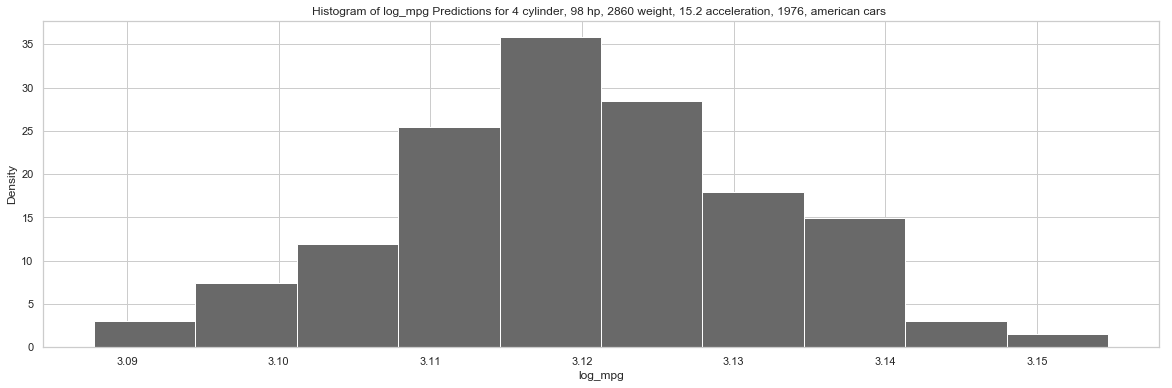

In [119]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(posterior_prediction, color="DimGray", density=True)
axes.set_xlabel( "log_mpg")
axes.set_ylabel( "Density")
axes.set_title("Histogram of log_mpg Predictions for 4 cylinder, 98 hp, 2860 weight, 15.2 acceleration, 1976, american cars ")

plt.show()
plt.close()

Our 95% credible interval (or Bayesian confidence interval) is:

In [120]:
print("95% BCI", stats.mstats.mquantiles( posterior_prediction, [0.025, 0.975]))

95% BCI [3.09593433 3.14533821]


Note that this bound is a lot tighter.

Equivalent to a range of mpg values of:

In [121]:
np.exp(stats.mstats.mquantiles( posterior_prediction, [0.025, 0.975]))

array([22.10788496, 23.22753003])